#### *Elements of Exploratory data analysis* 
 * The Distribution of the target Variable 
 * The features in the dataset 
 * The distribution of values in these features
 * The quality of the data
 * The Number of missing values  


##### Importing Libraries

In [102]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns
%matplotlib inline 

In [103]:
df = pd.read_csv('data.csv')
print("Number of records : " ,len(df))
print("the shape of the data frame is : " ,df.shape)

Number of records :  11914
the shape of the data frame is :  (11914, 16)


In [104]:
df.head()


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [105]:
# transform Columns into an appropriate shape
df.columns = df.columns.str.lower().str.replace(' ' , '_')

# Selecting only columns with string values to reshape them
string_columns = list(df.dtypes[df.dtypes == 'object'].index)
for col in string_columns :
    df[col] = df[col].str.lower().str.replace(' ','_' )

In [106]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [107]:
df.isnull().count()

make                 11914
model                11914
year                 11914
engine_fuel_type     11914
engine_hp            11914
engine_cylinders     11914
transmission_type    11914
driven_wheels        11914
number_of_doors      11914
market_category      11914
vehicle_size         11914
vehicle_style        11914
highway_mpg          11914
city_mpg             11914
popularity           11914
msrp                 11914
dtype: int64

This dataset contains multiple columns:
 * make: make of a car (BMW, Toyota, and so on)
 * model: model of a car
 * year: year when the car was manufactured
 * engine_fuel_type: type of fuel the engine needs (diesel, electric, and so on)
 * engine_hp: horsepower of the engine
 * engine_cylinders: number of cylinders in the engine
 * transmission_type: type of transmission (automatic or manual)
 * driven_wheels: front, rear, all
 * number_of_doors: number of doors a car has
 * market_category: luxury, crossover, and so on
 * vehicle_size: compact, midsize, or large
 * vehicle_style: sedan or convertible
 * highway_mpg: miles per gallon (mpg) on the highway
 * city_mpg: miles per gallon in the city
 * popularity: number of times the car was mentioned in a Twitter stream
 * msrp: manufacturer’s suggested retail price

#### *Target variable analysis*

The MSRP columns contains the most important information , its our target variable the Y which is the value we want to learn to predict 

<AxesSubplot:xlabel='msrp', ylabel='Count'>

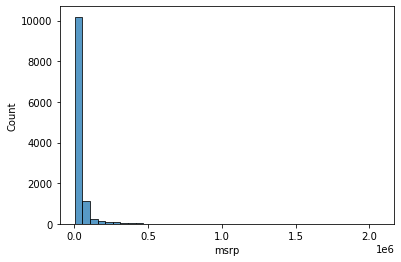

In [108]:
# Basic first Steps in EDA is to look always to how the values if y look like
# We typically do this by checking the distribution of y:
sns.histplot(df.msrp,bins=40)

###### The distribution of the past graph has a very long tail there are many cars with low prices on the left side ,But the number quickly drops , We can have a closer look by zooming in a bit and looking at values below $100,000


<AxesSubplot:xlabel='msrp', ylabel='Count'>

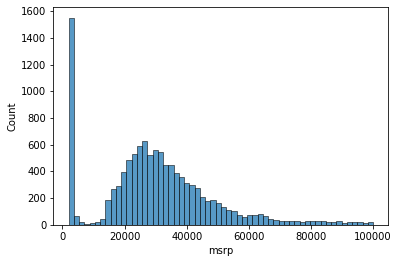

In [109]:
sns.histplot(df.msrp[df.msrp < 100000])

###### The long tail makes it quite difficult for us to see the distribution, but it has an even stronger effect on a model: such distribution can greatly confuse the model, so it won’t learn well enough. One way to solve this problem is log transformation. If we apply the log function to the prices, it removes the undesired effect 
                      Y(new) = Log(y+1)

In [110]:
log_price = np.log1p(df.msrp)


<AxesSubplot:xlabel='msrp', ylabel='Count'>

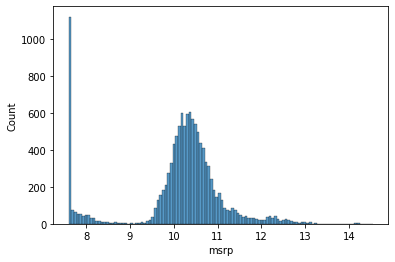

In [111]:
sns.histplot(log_price)


#### *Checking for missing values*

In [112]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

###### A few columns have missing values especially market_category , in which  we have almost 4000 rows with missing values , We need to deal with missing values later when we train the model, so we should keep this problem in mind. For now, we don’t do anything else with these features and proceed to the next step: setting up the validation framework so that we can train andtest machine learning models

#### Validation framework
     * 20% of data goes to validation.
     * 20% goes to test.
     * The remaining 60% goes to train.


- Splitting Data into validation, test, and training sets


In [113]:
n = len(df) #gets the number of rows 
#Calculates how many rows should go to train , Validation and test
n_val = int(0.2 * n) 
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)
#fixes the random seed to make sure that the results are reproducible
np.random.seed(2)
#creates a NumPy array with indices from 0 to (n–1), and shuffles it
idx = np.arange(n)
np.random.shuffle(idx)
#Uses the array with indices to get a shuffled DataFrame
df_shuffled = df.iloc[idx]
#splits the shuffled DataFrame into train, validation, and test
df_train = df_shuffled.iloc[:n_train].copy() 
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy() 
df_test = df_shuffled.iloc[n_train+n_val:].copy() 


###### Now the DataFrame is split into three parts, and we can continue. Our initial analysis showed a long tail in the distribution of prices, and to remove its effect, we need toapply the log transformation. We can do that for each DataFrame separately:

In [114]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)


###### To avoid accidentally using the target variable later, we remove it from the dataframes

In [115]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']
#  Removing the target variable is an optional step. But it’s helpful to make
#sure that we don’t use it when training a model: if that happens, we’d use price
#for predicting the price, and our model would have perfect accuracy.'''

###### After performing the initial data analysis, we are ready to train a model. The problem we are solving is a regression problem: the goal is to predict a number — the price of a car. For this project we will use the simplest regression model: linear regression.

Linear Regression implementation in NumPy 

In [116]:
def train_linear_regression(X,y):
         # adding dummy column
        ones = np.ones(X.shape[0])
        X = np.column_stack([ones, X])
        # Normal equation form
        XTX = X.T.dot(X)
        XTX_inv = np.linalg.inv(XTX)
        w = XTX_inv.dot(X.T).dot(y)
        return w[0], w[1:] 


BaseLine Solution

In [117]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg',
 'popularity']


In [118]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X= df_num.values
    return X

In [119]:
X_train = prepare_X(df_train)
w_0 , w = train_linear_regression(X_train,y_train)

In [120]:
y_pred = w_0 + X_train.dot(w)

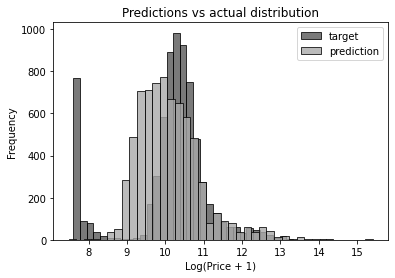

In [121]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

Evaluating model quality Using RMSE
root-mean-square error 
###### (RMSE) is a frequently used measure of the differences between values (sample or population values) predicted by a model or an estimator and the values observed


In [122]:
def rmse(y,y_pred):
    error = y_pred - y 
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [123]:
rmse(y_train,y_pred)


0.7554192603920132

In [124]:
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)


In [125]:
rmse(y_val, y_pred)


0.761653099130156

basic feature engineering

In [126]:
df_train.year.max()

2017

In [127]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    df['age'] = 2017 - df.year
    features.append('age')

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

 Let’s test if adding the feature “age” leads to any improvements

In [128]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation', rmse(y_val, y_pred))


train 0.5175055465840046
validation 0.5172055461058299


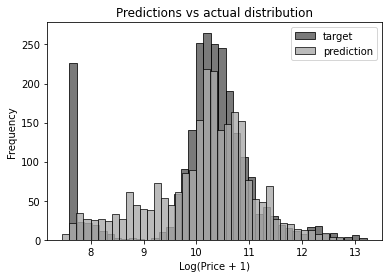

In [129]:
plt.figure(figsize=(6, 4))


sns.histplot(y_val, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [130]:
df['make'].value_counts().head(5)

chevrolet     1123
ford           881
volkswagen     809
toyota         746
dodge          626
Name: make, dtype: int64

In [131]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')

    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [132]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

train: 0.5058876515487503
validation: 0.5076038849556717


In [133]:
df['engine_fuel_type'].value_counts()

regular_unleaded                                7172
premium_unleaded_(required)                     2009
premium_unleaded_(recommended)                  1523
flex-fuel_(unleaded/e85)                         899
diesel                                           154
electric                                          66
flex-fuel_(premium_unleaded_required/e85)         54
flex-fuel_(premium_unleaded_recommended/e85)      26
flex-fuel_(unleaded/natural_gas)                   6
natural_gas                                        2
Name: engine_fuel_type, dtype: int64

In [134]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)

    for v in ['regular_unleaded', 'premium_unleaded_(required)', 
              'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)']:
        feature = 'is_type_%s' % v
        df[feature] = (df['engine_fuel_type'] == v).astype(int)
        features.append(feature)
        
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X


In [135]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

train: 0.47884826150785975
validation: 0.47482567372230117


In [136]:
df['transmission_type'].value_counts()

automatic           8266
manual              2935
automated_manual     626
direct_drive          68
unknown               19
Name: transmission_type, dtype: int64

Adding More features

In [137]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)

    for v in ['regular_unleaded', 'premium_unleaded_(required)', 
              'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)']:
        feature = 'is_type_%s' % v
        df[feature] = (df['engine_fuel_type'] == v).astype(int)
        features.append(feature)

    for v in ['automatic', 'manual', 'automated_manual']:
        feature = 'is_transmission_%s' % v
        df[feature] = (df['transmission_type'] == v).astype(int)
        features.append(feature)
        
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [138]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

train: 0.4745380510924004
validation: 0.4685879194658518


In [139]:
df['driven_wheels'].value_counts()


front_wheel_drive    4787
rear_wheel_drive     3371
all_wheel_drive      2353
four_wheel_drive     1403
Name: driven_wheels, dtype: int64

In [140]:
df['market_category'].value_counts().head(5)


crossover             1110
flex_fuel              872
luxury                 855
luxury,performance     673
hatchback              641
Name: market_category, dtype: int64

In [141]:
df['vehicle_size'].value_counts().head(5)


compact    4764
midsize    4373
large      2777
Name: vehicle_size, dtype: int64

In [142]:
df['vehicle_style'].value_counts().head(5)


sedan            3048
4dr_suv          2488
coupe            1211
convertible       793
4dr_hatchback     702
Name: vehicle_style, dtype: int64

In [143]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)

    for v in ['regular_unleaded', 'premium_unleaded_(required)', 
              'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)']:
        feature = 'is_type_%s' % v
        df[feature] = (df['engine_fuel_type'] == v).astype(int)
        features.append(feature)

    for v in ['automatic', 'manual', 'automated_manual']:
        feature = 'is_transmission_%s' % v
        df[feature] = (df['transmission_type'] == v).astype(int)
        features.append(feature)

    for v in ['front_wheel_drive', 'rear_wheel_drive', 'all_wheel_drive', 'four_wheel_drive']:
        feature = 'is_driven_wheens_%s' % v
        df[feature] = (df['driven_wheels'] == v).astype(int)
        features.append(feature)

    for v in ['crossover', 'flex_fuel', 'luxury', 'luxury,performance', 'hatchback']:
        feature = 'is_mc_%s' % v
        df[feature] = (df['market_category'] == v).astype(int)
        features.append(feature)

    for v in ['compact', 'midsize', 'large']:
        feature = 'is_size_%s' % v
        df[feature] = (df['vehicle_size'] == v).astype(int)
        features.append(feature)

    for v in ['sedan', '4dr_suv', 'coupe', 'convertible', '4dr_hatchback']:
        feature = 'is_style_%s' % v
        df[feature] = (df['vehicle_style'] == v).astype(int)
        features.append(feature)

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [144]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

train: 56.54571054823816
validation: 18.59552700502602


In [145]:
w_0


-2187202124032983.8

Regularization

In [146]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [147]:
X_train = prepare_X(df_train)


In [148]:
for r in [0, 0.001, 0.01, 0.1, 1, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    print('%5s, %.2f, %.2f, %.2f' % (r, w_0, w[13], w[21]))

    0, -2187202124032983.75, 1.42, 2187202124035056.50
0.001, 7.19, -0.10, 1.81
 0.01, 7.18, -0.10, 1.81
  0.1, 7.05, -0.10, 1.78
    1, 6.22, -0.10, 1.56
   10, 4.39, -0.09, 1.08


In [149]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('val', rmse(y_val, y_pred))

train 56.54571054823816
val 18.59552700502602


In [150]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('val', rmse(y_val, y_pred))

train 0.4643124894552559
val 0.460239496307584


In [151]:
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)

for r in [0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, rmse(y_val, y_pred))

 1e-06 0.4602251814445621
0.0001 0.46022549166922455
 0.001 0.46022676252085576
  0.01 0.460239496307584
   0.1 0.46037006958019216
     1 0.4618298042650009
     5 0.4684079627532227
    10 0.47572481006940465


In [152]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

X_test = prepare_X(df_test)
y_pred = w_0 + X_test.dot(w)
print('test:', rmse(y_test, y_pred))

validation: 0.460239496307584
test: 0.4571813679532485


Using the model


In [154]:
i = 2
ad = df_test.iloc[i].to_dict()
ad

{'make': 'toyota',
 'model': 'venza',
 'year': 2013,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 268.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'all_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': 'crossover,performance',
 'vehicle_size': 'midsize',
 'vehicle_style': 'wagon',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

In [155]:
X_test = prepare_X(pd.DataFrame([ad]))[0]
y_pred = w_0 + X_test.dot(w)
suggestion = np.expm1(y_pred)
suggestion

28294.135901411304